# Fibonacci Numbers [[1]](https://en.wikipedia.org/wiki/Fibonacci_number)

In mathematics, the Fibonacci numbers are the numbers in the following integer sequence, called the Fibonacci sequence, and characterized by the fact that every number after the first two is the sum of the two preceding ones:

$$ 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, \cdots$$

In mathematical terms, the sequence $F_n$ of Fibonacci numbers is defined by the recurrence relation:

$$ F_{n}=F_{n-1}+F_{n-2} $$

with seed values:
$$ F_0 = 0 , F_1 = 1 $$



In matrix notation this definition is equivalent to:

\begin{eqnarray}
    \begin{bmatrix}
    F_1 \\
    F_0
    \end{bmatrix}
    & = &
    \begin{bmatrix}
    1 \\
    0
    \end{bmatrix} \\
    \begin{bmatrix}
    F_{n+1} \\
    F_n
    \end{bmatrix}
    & = &
    \begin{bmatrix}
    1 & 1 \\
    1 & 0
    \end{bmatrix}
    \begin{bmatrix}
    F_n \\
    F_{n-1}
    \end{bmatrix}
\end{eqnarray}

If we want to compute only the $n^{th}$ Fibonacci number, then the following identity is useful:

\begin{equation}
    \begin{bmatrix}
    F_{n} \\
    F_{n-1}
    \end{bmatrix} =
    \begin{bmatrix}
    1 & 1 \\
    1 & 0
    \end{bmatrix}^{n-1}
    \begin{bmatrix}
    F_1 \\
    F_0
    \end{bmatrix}
\end{equation}

By using matrix exponentiation (for instance, calculating $M^8$ as $((M^2)^2)^2$ ), $F_{n}$ can be calculated in $O(log(n))$ time complexity. This algorithm is sometimes called **fast fibonacci transform**.

**Follow the instructions in the next sections. Feel free to create extra cells (for instance, you can try different values for $F_1$ and $F_0$).**

### 1. Fast Fibonacci Transform Implementation

Implement a function that returns $F_n$ as we described above (for this assignment we are not concerned about the efficiency of your implementation, i.e. you can use $M^n$ assuming octave does matrix exponentiation for you):

In [67]:
function result = fast_fibonacci(seedValueZero, seedValueOne, iterationNumber)
    seedValuesVector = [seedValueOne;seedValueZero];
    transformMatrix = [1,1;1,0];
    resultVector = transformMatrix ^ (iterationNumber-1) * seedValuesVector;
    result = resultVector(1,1);
endfunction

#example result for seed values F0=0, F1=1 and n=4
fast_fibonacci(0, 1, 2)

ans =  1


### 2. Plot $F_{n+1} / F_n$ ratio

Initialize $F_0 = 0$ and $F_1 = 1$, then plot the $\dfrac{F_{n+1}}{F_{n}}$ values for $ 1 \leq n \leq 100$. As $n \to \infty$, we expect $\dfrac{F_{n+1}}{F_{n}} \to \dfrac{\sqrt{5}+1}{2}$. 

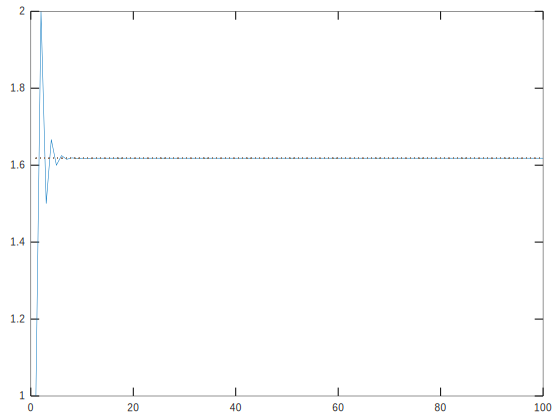

In [72]:
x=1:100;
result_list = [];
for n = x
    result_list(n) = fast_fibonacci(0,1,n+1) / fast_fibonacci(0,1,n);
endfor

referance = (sqrt(5)+1)/2;
referance_list = ones(100)*referance;

plot(x,result_list,x,referance_list,":")

### 3. Plot $F_{n+1} / F_n$ ratio starting with $F_0 = 2$ and $F_1 = 1 - \sqrt{5}$

Initialize $F_0 = 2$ and $F_1 = F_1 = 1 - \sqrt{5}$, then plot the $\dfrac{F_{n+1}}{F_{n}}$ values for $ 1 \leq n \leq 100$. If we would represent $\sqrt{5}$ exactly in our floating point arithmetic, then as $n \to \infty$, we expect  $\dfrac{F_{n+1}}{F_{n}} \to \dfrac{1 - \sqrt{5}}{2}$, but for the very large values of $n$, this ratio unexpectedly converges to $\dfrac{\sqrt{5} + 1}{2}$.

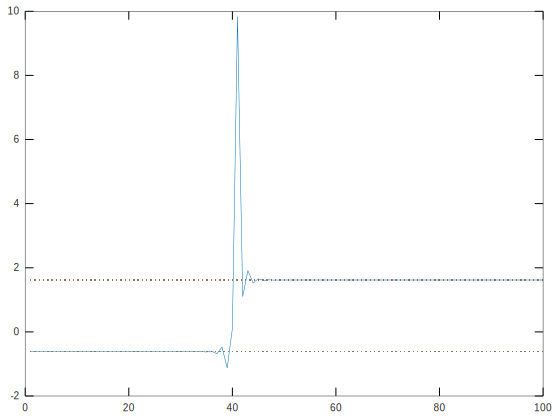

In [71]:
x=1:100;
result_list = [];
values = [2,1-sqrt(5)];
for n = x
    values(n+2) = values(n) + values(n+1);
    result_list(n) = values(n+1)/values(n);
endfor

referance1 = (sqrt(5)+1)/2;
referance_list1 = ones(100)*referance;

referance2 = (1-sqrt(5))/2;
referance_list2 = ones(100)*referance2;

plot(x,result_list,x,referance_list1,":",x,referance_list2,":")